In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Histogram of Price')

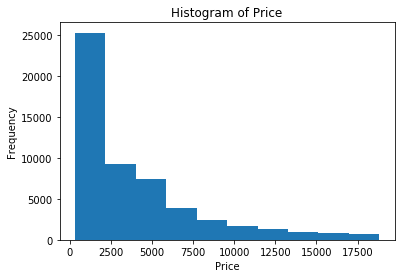

In [15]:
plt.hist(df.price, bins = 10);
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")

Text(0.5, 1.0, 'Histogram of log(Price)')

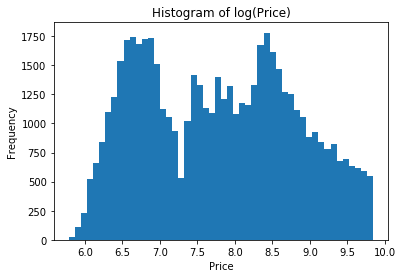

In [14]:
plt.hist(np.log(df.price), bins = 50);
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of log(Price)")

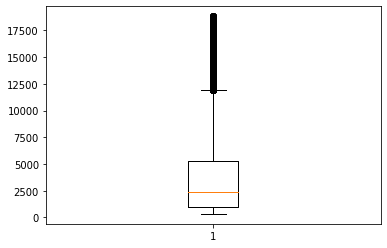

In [17]:
plt.boxplot(df.price);

In [20]:
a = np.array([1, 9, 10, 2, 7, 3])
np.mean(a), np.std(a), np.median(a)

(5.333333333333333, 3.496029493900505, 5.0)

In [21]:
a = np.array([1, 9, 10, 2, 7, 3, 100])
np.mean(a), np.std(a), np.median(a)

(18.857142857142858, 33.28418144845803, 7.0)

In [23]:
q1, q3 = np.percentile(a, [25, 75])

In [25]:
iqr = q3 - q1
iqr

7.0

In [28]:
def find_outlier(a):
    q1, q3 = np.percentile(a, [25, 75])
    iqr = q3 - q1
    lower_whisker = max(q1 - 1.5 * iqr, np.min(a))
    upper_whisker = min(q3 + 1.5 * iqr, np.max(a))
    print(lower_whisker, upper_whisker)
    return (a>upper_whisker) | (a<lower_whisker)

In [29]:
find_outlier(a)

1 20.0


array([False, False, False, False, False, False,  True])

In [30]:
a

array([  1,   9,  10,   2,   7,   3, 100])

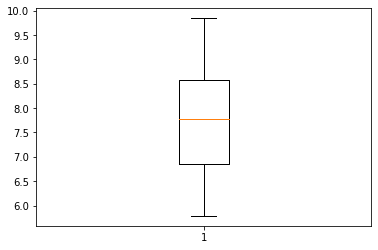

In [32]:
plt.boxplot(np.log(df.price));

In [34]:
df[find_outlier(df.price)].shape

326 11885.625


(3540, 10)

In [35]:
df.shape

(53940, 10)

In [36]:
3540/53940

0.06562847608453838

In [37]:
len(df.price)

53940

In [38]:
len(np.log(df.price))

53940

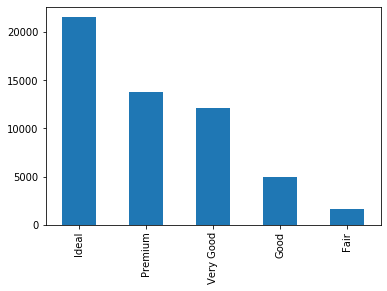

In [40]:
df.cut.value_counts().plot.bar()

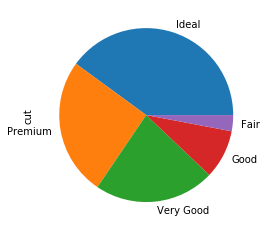

In [41]:
df.cut.value_counts().plot.pie()

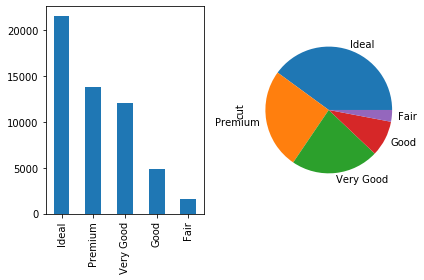

In [43]:
fig, axes = plt.subplots(1, 2)
df.cut.value_counts().plot.bar(ax = axes[0])
df.cut.value_counts().plot.pie(ax = axes[1])
plt.tight_layout()

Text(0, 0.5, 'Price')

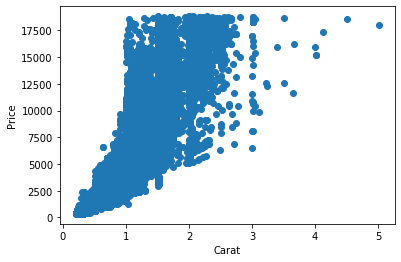

In [45]:
plt.scatter(df.carat, df.price)
plt.xlabel("Carat")
plt.ylabel("Price")

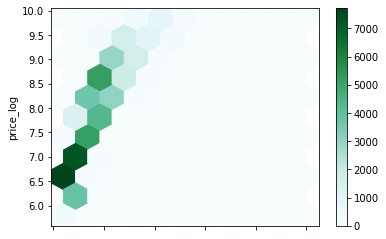

In [79]:
def my_func(x):
    return np.mean(np.log(x))
df["price_log"] = np.log(df.price)
df.plot.hexbin("carat", "price_log"
        , gridsize=10, reduce_C_function="mean")

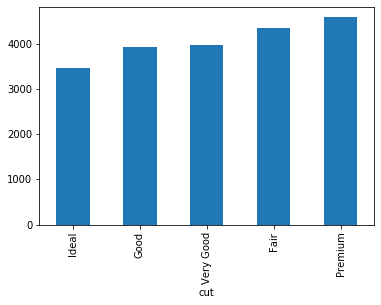

In [48]:
df.groupby("cut").price.mean().sort_values().plot.bar()

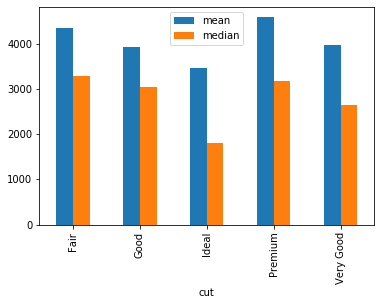

In [49]:
df.groupby("cut").price.agg(["mean", "median"]).plot.bar()

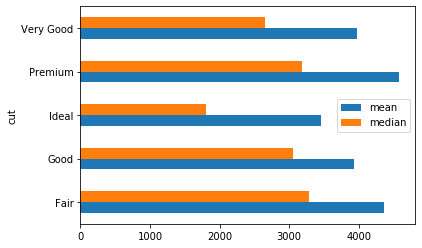

In [54]:
p = df.groupby("cut").price.agg(["mean", "median"]).plot
p.barh()

In [61]:
agg = df.pivot_table("price",  "color", "cut",)

In [62]:
import seaborn as sns

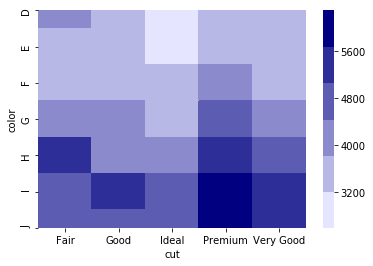

In [66]:
sns.heatmap(agg, cmap=sns.light_palette("navy"))

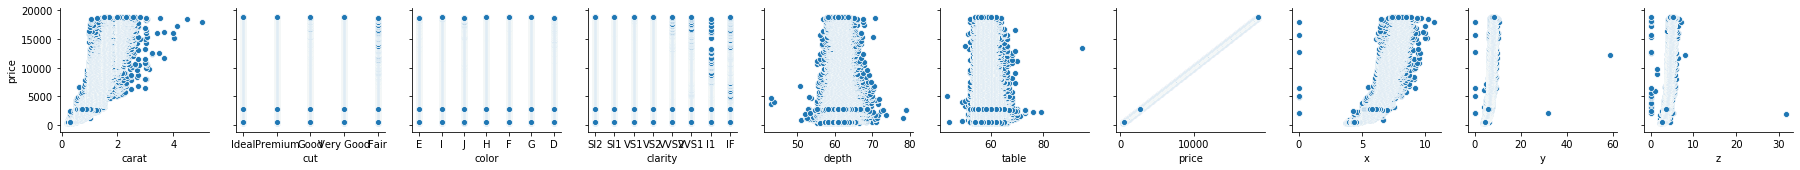

In [68]:
sns.pairplot(df, y_vars=["price"], x_vars=df.columns)